# Esercizio 11.3

In questo esercizio è richiesto di utilizzare la rete neurale per fittare una funzione seno a due variabili x e y.

$$
z = sin(x^2 + y^2)
$$

È stato quindi modificata l'input shape dei primi neuroni per eseguire un fit di una funzione a due variabili.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from tensorflow.keras.models import Sequential
from matplotlib import cm

from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# funzione usata per fit è  f(x,y) = sin(x^2+y^2)
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 1000)
x_valid = np.random.uniform(-1.5, 1.5, 100)
y_train = np.random.uniform(-1.5, 1.5, 1000)
y_valid = np.random.uniform(-1.5, 1.5, 100)

dati_train = np.column_stack((x_train,y_train))
dati_valid = np.column_stack((x_valid,y_valid))

x_valid.sort()
y_valid.sort()
#x_valid, y_valid = np.meshgrid(x_valid, y_valid)
z_target = np.sin(pow(x_valid,2)+pow(y_valid,2))
R_train = (pow(x_train,2)+pow(y_train,2))
R_valid = (pow(x_valid,2)+pow(y_valid,2))


sigma = 0.0 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(np.sin(pow(x_train,2)+pow(y_train,2)) , sigma) 
z_valid = np.random.normal(np.sin(pow(x_valid,2)+pow(y_valid,2)))

# plot training and target dataset
#fig = plt.figure()
#ax = Axes3D(fig)
#surf = ax.plot_surface(x_valid,y_valid,z_target,linewidth=7, cmap=cm.coolwarm)
#ax.scatter(x_valid,y_valid,z_valid, marker='.',s = 2, cmap=cm.coolwarm)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#fig.colorbar(surf, shrink=0.5, aspect=5)

#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')
#plt.show()


In [60]:
model=tf.keras.Sequential()
model.add(Dense(4,input_shape=(2,)))
model.add(Dense(1,))
model.add(Dense(3,activation='elu'))
model.add(Dense(2,activation='selu'))
model.add(Dense(1,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 5         
_________________________________________________________________
dense_57 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 4         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [61]:
# fit the model using training dataset
# over 60 epochs of 32 batc size each
# report training progress against validation 
history = model.fit(x=dati_train, y=z_train,
          batch_size=32, epochs=50,
          shuffle=True, 
          validation_data=(dati_valid, z_valid))

Epoch 1/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2749 - mse: 0.2749 - val_loss: 1.2662 - val_mse: 1.2662
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1698 - mse: 0.1698 - val_loss: 1.2969 - val_mse: 1.2969
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1601 - mse: 0.1601 - val_loss: 1.2939 - val_mse: 1.2939
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1568 - mse: 0.1568 - val_loss: 1.3117 - val_mse: 1.3117
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1552 - mse: 0.1552 - val_loss: 1.2955 - val_mse: 1.2955
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1543 - mse: 0.1543 - val_loss: 1.2981 - val_mse: 1.2981
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1538 - mse: 0.1538 - val_loss: 1.2935 - val_mse: 1.2935
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1536 - mse: 0.15

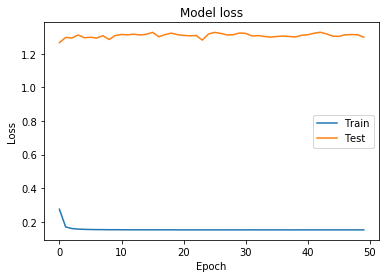

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


Sono state effettuate varie prove ma l'errore del campione di test rimane 5 volte più alto dell'errore di training. Non è un problema di overfitting poiché cambiando il numero di neuroni per layer e diminuendoli (o aumentandoli) di molto l'errore non varia; vale la stessa cosa per il numero di layer.